<img src='pics/otus.png'>

In [1]:
from __future__ import print_function
from collections import defaultdict
import pandas as pd
import numpy as np
import matplotlib
# import pandas_profiling
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

%matplotlib inline
plt.rcParams["figure.figsize"] = (15, 8)
pd.options.display.float_format = '{:.2f}'.format

In [2]:
fn = 'orders.csv'

In [3]:
!head $fn

DISCOUNT_VALUE,NAME,PRICE,QUANTITY,date_insert,discount,itemID,orderID,ordered_item_count,price,user_id
23.55%,Хроники Амбера. Том 2,357.0,1,2017-03-19 22:25:20,110.0,169108,602051,1,527.0,911531
4.07%,Хроники Амбера. Том 1,448.0,1,2017-03-19 22:19:58,19.0,1394744,602047,1,618.0,911531
4.17%,Пищеводитель,414.0,1,2017-03-19 20:58:00,65.0,191276,602017,4,1503.0,911587
4.17%,"Аудиокн. Мясников. &quot;Ржавчина&quot;: что делать, чтобы сердце не болело",253.0,1,2017-03-19 20:58:00,65.0,157945,602017,4,1503.0,911587
4.09%,Инфекции. Как защитить себя и своего ребенка,422.0,1,2017-03-19 20:58:00,65.0,205173,602017,4,1503.0,911587
4.17%,О самом главном с доктором Мясниковым,414.0,1,2017-03-19 20:58:00,65.0,189415,602017,4,1503.0,911587
4.12%,Пеппи Длинныйчулок собирается в путь,489.0,1,2017-03-19 20:53:51,42.0,168183,602015,2,1238.0,201724
4.12%,Пеппи Длинныйчулок в стране Веселии,489.0,1,2017-03-19 20:53:51,42.0,186112,602015,2,1238.0,201724
4.09%,Серебряный шар. Драма за сценой,586.0,1,2017-0

# 1. Провести EDA
Просмотреть структуру данных, значения каждого признака, поискать особенности в признаках и в данных вцелом

In [4]:
df = pd.read_csv('orders.csv')

In [5]:
df.shape

(557818, 11)

In [6]:
df.head(10)

,DISCOUNT_VALUE,NAME,PRICE,QUANTITY,date_insert,discount,itemID,orderID,ordered_item_count,price,user_id
0,23.55%,Хроники Амбера. Том 2,357.00,1,2017-03-19 22:25:20,110.00,169108,602051,1,527.00,911531
1,4.07%,Хроники Амбера. Том 1,448.00,1,2017-03-19 22:19:58,19.00,1394744,602047,1,618.00,911531
2,4.17%,Пищеводитель,414.00,1,2017-03-19 20:58:00,65.00,191276,602017,4,1503.00,911587
3,4.17%,Аудиокн. Мясников. &quot;Ржавчина&quot;: что д...,253.00,1,2017-03-19 20:58:00,65.00,157945,602017,4,1503.00,911587
4,4.09%,Инфекции. Как защитить себя и своего ребенка,422.00,1,2017-03-19 20:58:00,65.00,205173,602017,4,1503.00,911587
5,4.17%,О самом главном с доктором Мясниковым,414.00,1,2017-03-19 20:58:00,65.00,189415,602017,4,1503.00,911587
6,4.12%,Пеппи Длинныйчулок собирается в путь,489.00,1,2017-03-19 20:53:51,42.00,168183,602015,2,1238.00,201724
7,4.12%,Пеппи Длинныйчулок в стране Веселии,489.00,1,2017-03-19 20:53:51,42.00,186112,602015,2,1238.00,201724
8,4.09%,Серебряный шар. Драма за сценой,586.00,1,2017-03-19 20:28:54,25.00,181388,602005,1,586.00,77858
9,4.49%,Тимур и его команда,170.00,1,2017-03-19 20:23:24,15.00,149381,602004,2,562.00,355403


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 557818 entries, 0 to 557817
Data columns (total 11 columns):
DISCOUNT_VALUE        553777 non-null object
NAME                  557811 non-null object
PRICE                 557818 non-null float64
QUANTITY              557818 non-null int64
date_insert           557818 non-null object
discount              557818 non-null float64
itemID                557818 non-null int64
orderID               557818 non-null int64
ordered_item_count    557818 non-null int64
price                 557818 non-null float64
user_id               557818 non-null int64
dtypes: float64(3), int64(5), object(3)
memory usage: 46.8+ MB


In [8]:
df.describe()

,PRICE,QUANTITY,discount,itemID,orderID,ordered_item_count,price,user_id
count,557818.00,557818.00,557818.00,557818.00,557818.00,557818.00,557818.00,557818.00
mean,242.73,1.65,519.41,562126.66,662756.84,12.15,2797.27,641006.11
std,261.93,5.05,1032.42,557123.66,37746.44,19.61,7586.23,386439.17
min,0.00,1.00,-1963.00,131823.00,597731.00,1.00,1.00,3.00
25%,92.00,1.00,175.00,178533.00,630532.00,4.00,1053.00,194865.00
50%,185.74,1.00,313.00,196485.00,662686.00,7.00,1389.00,911644.00
75%,313.00,1.00,537.00,727802.00,694208.00,13.00,2276.40,948489.00
max,19792.18,500.00,23851.00,1787508.00,730392.00,277.00,386495.00,998104.00


Как видно, количество признаков не так уж велико и кроме DISCOUNT_VALUE и NAME они заполненны полностью.

#### Попробуем составить описание признаков руководствуясь здравым смыслом:

<ul>
<li>DISCOUNT_VALUE - процент скидки, категориальный признак, который легко трансформируется в количественный</li>
<li>NAME - имя товара, категориальный признак</li>
<li>PRICE - цена товара, количественный признак</li>
<li>QUANTITY - количество товаров в заказе, количественный признак</li>
<li>date_insert - дата заказа или формирования заказа, порядковый признак</li>
<li>discount - скидка, количественный признак</li>
<li>itemID - идентификатор товара, порядковый признак</li>
<li>orderID - идентификатор заказа, порядковый признак</li>
<li>ordered_item_count - общее количество товаров в заказе, количественный признак</li>
<li>price - сумма заказа, количественный признак</li>
<li>user_id - идентификатор пользователя, порядковый признак</li>
</ul>

#### Помотрим сколько в датасете уникальных покупателей, заказов и товаров:

In [9]:
# товары
df.itemID.unique().shape

(51890,)

In [10]:
# заказы
df.orderID.unique().shape

(127683,)

In [11]:
# покупатели
df.user_id.unique().shape

(76258,)

# 2. Спланировать эксперимент 

Задача:
* сегментация товаров + сегментация пользователей (по товарам, по поведению, скидкам и пр.)

Дополнительнительные задачи (опционально, подумайте о них, могут появиться интересные идеи и находки):
* поиск товаров-заменителей и товаров, дополняющих друг друга
* поиск выбросов среди товаров
* поиск выбросов среди заказов

Эксперимент - составить план, по которому будет проделана исследовательская работа. Примерные пункты плана:
* Составить первичный список признаков, необходимых для решения задачи
* Сгенерировать список новых признаков, которые можно получить из данных
* Применить понижение размерности для визуализации данных
* Применить кластеризацию, визуализировать
* Описание кластера
* Любые другие пункты

#### Так как объем данных очень большой, то ограничимся 10000 случайных записей, чтобы не перегружать системные ресурсы:

In [12]:
df = df.sample(n=10000)

#### Проверим на дубликаты и удалим если такие имеются:

In [13]:
df.duplicated().sum()

0

In [14]:
df.drop_duplicates(inplace = True)

#### Сразу переведем DISCOUNT_VALUE в количественный признак, чтобы можно было с ним работать, а пропущенные значиния заполним нулями:

In [15]:
df['DISCOUNT_VALUE'] = df['DISCOUNT_VALUE'] \
    .map(lambda x: float(x.replace('%', '')) if isinstance(x, str) else 0)

In [16]:
df.head(5)

,DISCOUNT_VALUE,NAME,PRICE,QUANTITY,date_insert,discount,itemID,orderID,ordered_item_count,price,user_id
460988,26.03,Биология. 10 класс. Базовый уровень. Рабочая т...,162.06,19,2017-09-09 13:13:17,106.08,741212,708109,2,6291.90,981968
194750,20.15,Стихи и сказки для самых маленьких,218.00,1,2017-05-31 07:44:40,289.00,185918,641691,4,1178.00,938159
519244,20.22,Русский язык. Русская словесность. 7 класс. Ра...,146.00,1,2017-09-19 13:06:00,37.00,1390477,718592,1,336.00,990376
306445,19.91,100 лучших рецептов для новогоднего стола,185.00,1,2017-07-19 14:48:01,434.00,150074,670545,7,1658.00,211818
216736,20.23,Хлеб с ветчиной,138.00,1,2017-06-11 15:21:00,280.00,713593,648703,12,1107.00,942946


In [17]:
nans = lambda df: df[df.isnull().any(axis=1)]

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 460988 to 359504
Data columns (total 11 columns):
DISCOUNT_VALUE        10000 non-null float64
NAME                  9999 non-null object
PRICE                 10000 non-null float64
QUANTITY              10000 non-null int64
date_insert           10000 non-null object
discount              10000 non-null float64
itemID                10000 non-null int64
orderID               10000 non-null int64
ordered_item_count    10000 non-null int64
price                 10000 non-null float64
user_id               10000 non-null int64
dtypes: float64(4), int64(5), object(2)
memory usage: 937.5+ KB


Если внимательно посмотреть на названия товаров, то можно заметить, что классифицировать их не так и просто. Можно отделить учебники от остальных книг, но дальше уже классификация будет не столь очевидна. Поэтому лучше ориентироваться на другие признаки.

#### Из имеющихся не количественных признаков можно особо выделить дату. Посмотрим как происходит распределение по месяцам:

In [19]:
import re

In [20]:
df_months = df['date_insert'].map(lambda x: int(re.sub(r'\d{4}-(\d{2})-\d{2}.*', r'\1', x)))

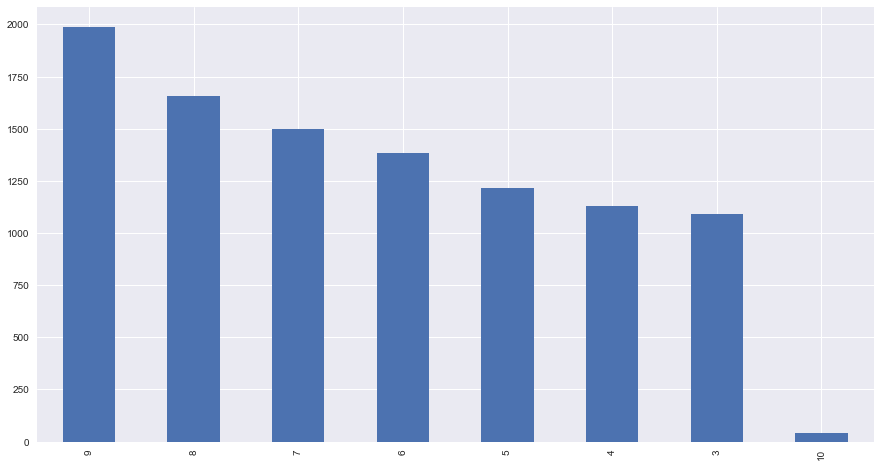

In [21]:
df_months.value_counts().plot(kind='bar');

Как видно, больше всего покупок было сделанно в августе и сентябре. Это наводит на определенные предположения, единственное "но", у нас есть статистика не за все месяцы, а для октября, скорее всего она не полная.

#### Это интересное свойство, поэтому выделим месяц в отдельную категорию:

In [22]:
df['month'] = df_months

In [23]:
df.head(5)

,DISCOUNT_VALUE,NAME,PRICE,QUANTITY,date_insert,discount,itemID,orderID,ordered_item_count,price,user_id,month
460988,26.03,Биология. 10 класс. Базовый уровень. Рабочая т...,162.06,19,2017-09-09 13:13:17,106.08,741212,708109,2,6291.90,981968,9
194750,20.15,Стихи и сказки для самых маленьких,218.00,1,2017-05-31 07:44:40,289.00,185918,641691,4,1178.00,938159,5
519244,20.22,Русский язык. Русская словесность. 7 класс. Ра...,146.00,1,2017-09-19 13:06:00,37.00,1390477,718592,1,336.00,990376,9
306445,19.91,100 лучших рецептов для новогоднего стола,185.00,1,2017-07-19 14:48:01,434.00,150074,670545,7,1658.00,211818,7
216736,20.23,Хлеб с ветчиной,138.00,1,2017-06-11 15:21:00,280.00,713593,648703,12,1107.00,942946,6


#### Для того, чтобы лучше понять как между собой коррелируют признаки (возьмем только количественные), построим тепловую карту для них:

In [24]:
features = [
    'DISCOUNT_VALUE',
    'PRICE',
    'QUANTITY',
    'discount',
    'ordered_item_count',
    'price',
    'month',
]

In [25]:
df_features = df[features]

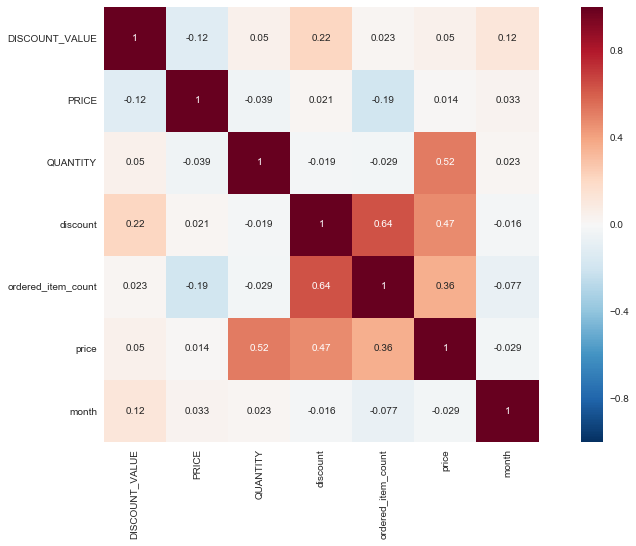

In [26]:
df_features_corr = np.corrcoef(df_features.values.T)
sns.heatmap(df_features_corr, annot=True, square=True, yticklabels=features, xticklabels=features);

Как видно, неплохая корреляция наблюдается между свойствами discount и ordered_item_count, discount и price, QUANTITY и price, ordered_item_count и price.

#### Проверим эти свойства на наличие выбросов:

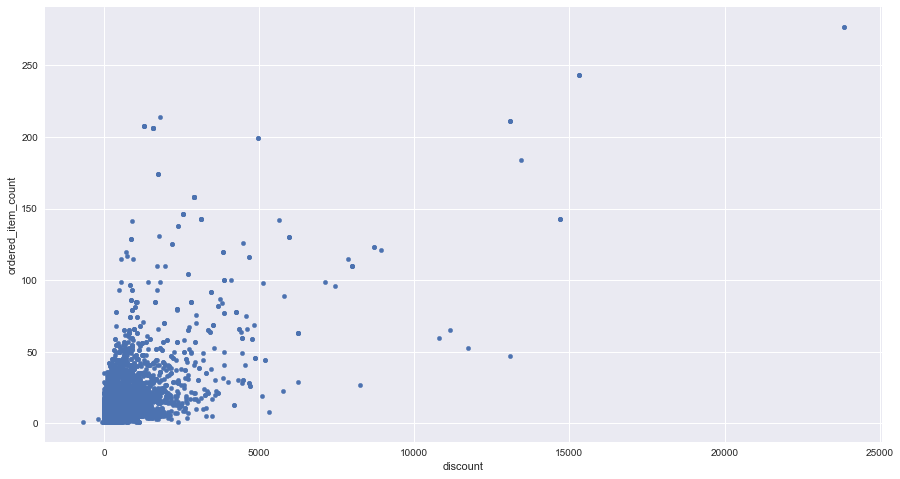

In [27]:
df.plot.scatter('discount', 'ordered_item_count')
plt.xlabel('discount')
plt.ylabel('ordered_item_count');

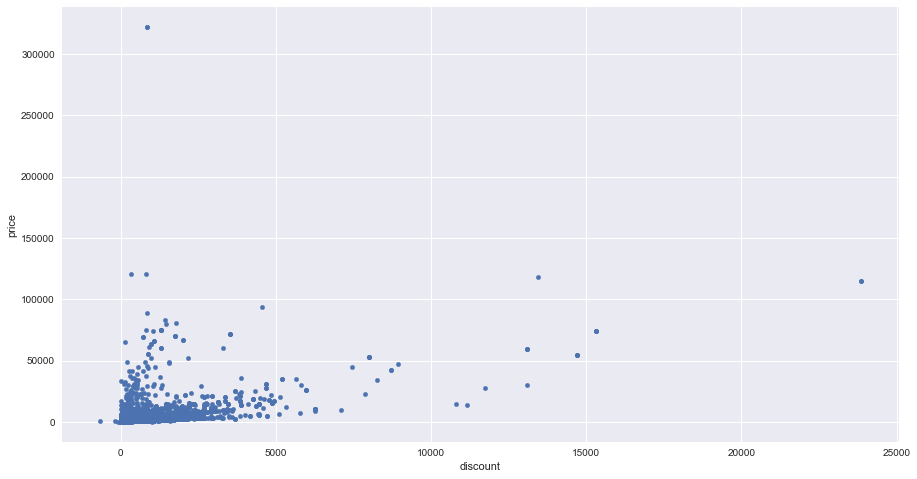

In [28]:
df.plot.scatter('discount', 'price')
plt.xlabel('discount')
plt.ylabel('price');

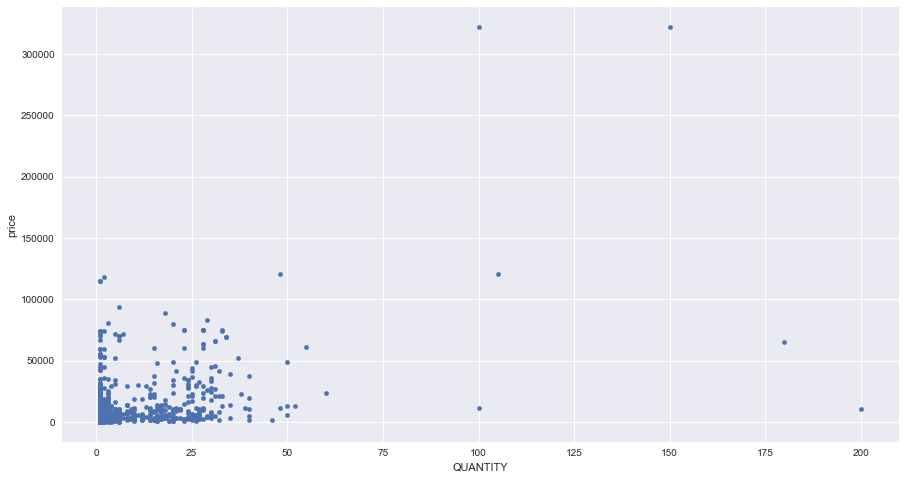

In [29]:
df.plot.scatter('QUANTITY', 'price')
plt.xlabel('QUANTITY')
plt.ylabel('price');

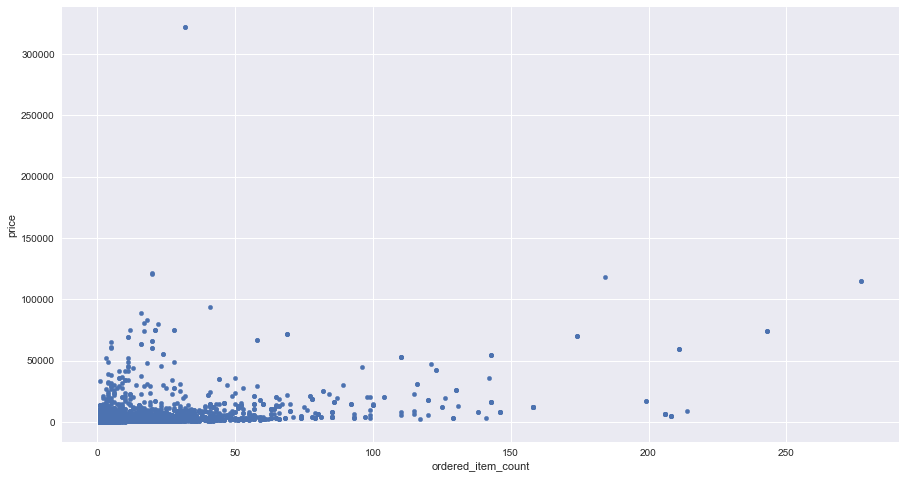

In [30]:
df.plot.scatter('ordered_item_count', 'price')
plt.xlabel('ordered_item_count')
plt.ylabel('price');

Как видно, выбросы так или иначе присутствуют во всех видах коррелирующих пар, что может дать определенные неточности при кластеризации.

# 3. Выполнить подготовку данных для построения модели

Выполнить необходимые преобразования данных

#### Тепловая карта дала определенное представление о том, как признаки взаимодействуют между собой, но не полное, чтобы лучше понять это взаимодействие, применим метод уменьшения размерности (PCA):

In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
scaler = StandardScaler()
X = scaler.fit_transform(df_features[['QUANTITY', 'discount', 'ordered_item_count', 'price']].as_matrix())
X

array([[ 3.4117742 , -0.45432116, -0.54664314,  0.4527795 ],
       [-0.13675643, -0.24324102, -0.43753383, -0.20555311],
       [-0.13675643, -0.53403588, -0.6011978 , -0.3139471 ],
       ..., 
       [-0.13675643, -0.52942009, -0.49208849, -0.18496597],
       [-0.13675643,  0.02909067,  1.36276994, -0.13307589],
       [-0.13675643, -0.30440026, -0.38297917, -0.13886892]])

# 4. Провести построение модели 

In [33]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

In [34]:
inertias = []
silhs = []
for n_clusters in range(2, 10):
    print(n_clusters)

    kmeans = KMeans(init='k-means++', n_clusters=n_clusters, n_init=30)
    kmeans.fit(X)
    clusters = kmeans.predict(X)
    silhouette_avg = silhouette_score(X, clusters)
    
    print("For n_clusters =", n_clusters, "The inertia_ is :", kmeans.inertia_, "The average silhouette_score is :", silhouette_avg)
    
    inertias.append(kmeans.inertia_)
    silhs.append(silhouette_avg)

2
For n_clusters = 2 The inertia_ is : 28334.5415149 The average silhouette_score is : 0.872163092258
3
For n_clusters = 3 The inertia_ is : 21948.5216978 The average silhouette_score is : 0.857647100616
4
For n_clusters = 4 The inertia_ is : 17501.5448161 The average silhouette_score is : 0.831490960427
5
For n_clusters = 5 The inertia_ is : 13983.308511 The average silhouette_score is : 0.81332075057
6
For n_clusters = 6 The inertia_ is : 11593.3477059 The average silhouette_score is : 0.629049688205
7
For n_clusters = 7 The inertia_ is : 10056.143041 The average silhouette_score is : 0.632726041831
8
For n_clusters = 8 The inertia_ is : 8605.96386483 The average silhouette_score is : 0.63311994639
9
For n_clusters = 9 The inertia_ is : 7502.25096754 The average silhouette_score is : 0.630619246776


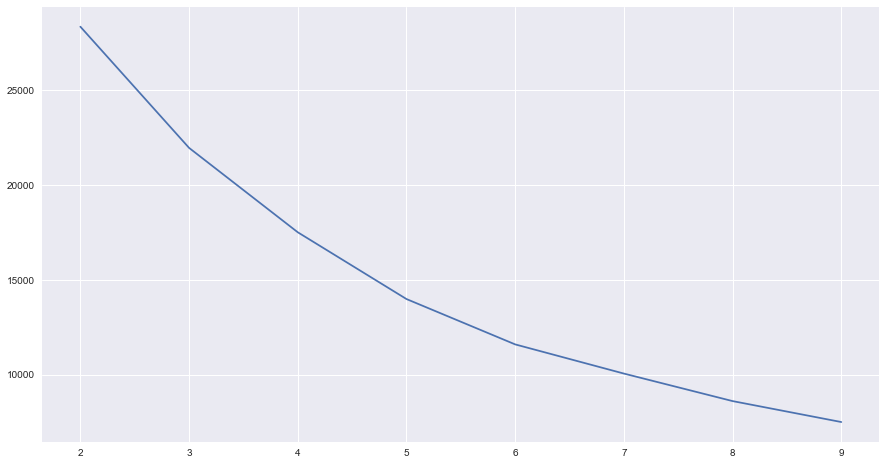

In [35]:
plt.plot(range(2, 10), inertias);

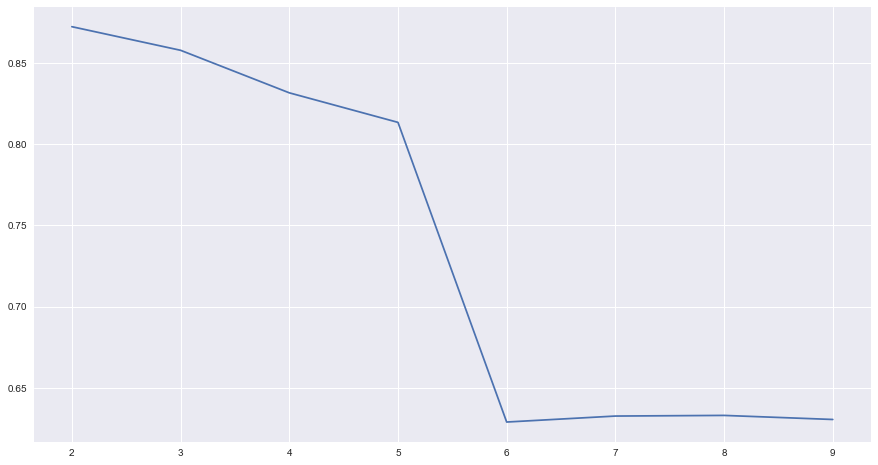

In [36]:
plt.plot(range(2, 10), silhs);

Если судить по инерции то, наибольший излом у графика инерции находится в районе 4 и 5. Возьмем значение 4 для первой попытки.

In [37]:
df_prod = pd.read_csv('orders.csv')

In [38]:
X_prod = scaler.fit_transform(df_prod[['QUANTITY', 'discount', 'ordered_item_count', 'price']].as_matrix())

In [39]:
n_clusters = 4
kmeans = KMeans(init='k-means++', n_clusters=n_clusters)
kmeans.fit(X_prod)
clusters = kmeans.predict(X_prod)

In [40]:
clusters.shape

(557818,)

# 5. Проанализировать результат
получилось или нет, почему, что можно улучшить, можно ли интерпретировать результат

In [41]:
df_prod['cluster'] = clusters

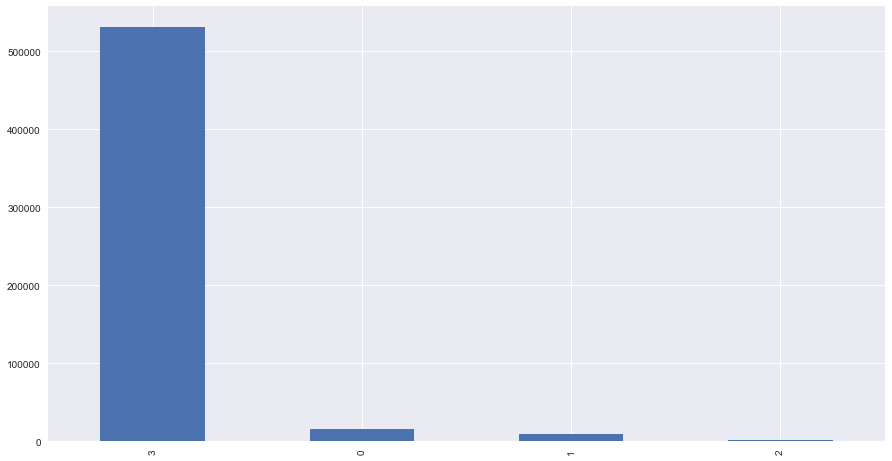

In [42]:
df_prod['cluster'].value_counts().plot(kind='bar');

#### Посмотрим какие значения попали в 0, 1, 2 и 3 кластера:

In [43]:
df_prod[df_prod.cluster == 0].head(5)

,DISCOUNT_VALUE,NAME,PRICE,QUANTITY,date_insert,discount,itemID,orderID,ordered_item_count,price,user_id,cluster
299,4.02%,#Пастапаста,1065.00,10,2017-03-17 15:46:28,4037.00,196138,600959,8,42544.00,175158,0
300,4.02%,#Мясомясо (книга+диск),999.00,4,2017-03-17 15:46:28,4037.00,195826,600959,8,42544.00,175158,0
301,4.02%,"Про еду, про вино, Прованс",903.00,6,2017-03-17 15:46:28,4037.00,195737,600959,8,42544.00,175158,0
302,4.02%,Вина Франции,1292.00,3,2017-03-17 15:46:28,4037.00,219306,600959,8,42544.00,175158,0
303,4.02%,Шампань и другие игристые вина,1292.00,3,2017-03-17 15:46:28,4037.00,709813,600959,8,42544.00,175158,0


In [44]:
df_prod[df_prod.cluster == 1].head(5)

,DISCOUNT_VALUE,NAME,PRICE,QUANTITY,date_insert,discount,itemID,orderID,ordered_item_count,price,user_id,cluster
306,4.08%,#неслипнется,512.00,15,2017-03-17 15:46:28,4037.00,188927,600959,8,42544.00,175158,1
562,45.06%,Животные. Все обитатели нашей планеты,834.00,23,2017-03-16 17:41:02,684.00,715598,600352,1,19182.00,198448,1
570,19.95%,Чайка. Три сестры. Вишневый сад (вес: 513гр.),276.00,36,2017-03-16 17:08:14,12.00,219266,600329,1,9936.00,910163,1
594,17.22%,Вселенная (+ наклейки для раскрашивания),298.00,41,2017-03-16 16:08:19,114.00,669491,600274,3,20818.00,910190,1
595,17.11%,Космос (с наклейками),155.00,33,2017-03-16 16:08:19,114.00,706157,600274,3,20818.00,910190,1


In [45]:
df_prod[df_prod.cluster == 2].head(5)

,DISCOUNT_VALUE,NAME,PRICE,QUANTITY,date_insert,discount,itemID,orderID,ordered_item_count,price,user_id,cluster
81195,20.08%,Атлас автодорог России стран СНГ и Балтии (при...,191.20,2,2017-04-12 13:59:09,15299.00,290512,616630,243,74235.60,60383,2
81196,20.21%,Атлас автодорог России стран СНГ и Балтии (при...,150.40,1,2017-04-12 13:59:09,15299.00,290514,616630,243,74235.60,60383,2
81197,19.95%,"Атлас автодорог России, стран СНГ и Балтии (пр...",344.80,1,2017-04-12 13:59:09,15299.00,272958,616630,243,74235.60,60383,2
81198,19.9%,"Атлас автодорог России, стран СНГ и Балтии (пр...",313.60,1,2017-04-12 13:59:09,15299.00,272959,616630,243,74235.60,60383,2
81199,20.11%,Атлас автодорог России стран СНГ и Балтии (при...,282.40,1,2017-04-12 13:59:09,15299.00,272998,616630,243,74235.60,60383,2


In [46]:
df_prod[df_prod.cluster == 3].head(5)

,DISCOUNT_VALUE,NAME,PRICE,QUANTITY,date_insert,discount,itemID,orderID,ordered_item_count,price,user_id,cluster
0,23.55%,Хроники Амбера. Том 2,357.00,1,2017-03-19 22:25:20,110.00,169108,602051,1,527.00,911531,3
1,4.07%,Хроники Амбера. Том 1,448.00,1,2017-03-19 22:19:58,19.00,1394744,602047,1,618.00,911531,3
2,4.17%,Пищеводитель,414.00,1,2017-03-19 20:58:00,65.00,191276,602017,4,1503.00,911587,3
3,4.17%,Аудиокн. Мясников. &quot;Ржавчина&quot;: что д...,253.00,1,2017-03-19 20:58:00,65.00,157945,602017,4,1503.00,911587,3
4,4.09%,Инфекции. Как защитить себя и своего ребенка,422.00,1,2017-03-19 20:58:00,65.00,205173,602017,4,1503.00,911587,3


Несмотря на то, что большая часть данных "свалилась" в один кластер, кое-какие интересные результаты все же можно извлечь:
<ul>
<li>В первый кластер попали, по всей видимости, обычные роздничные покупатели</li>
<li>Во второй кластер попали оптовые покупатели, покупающие разные книги (низкий параметр QUANTITY), готовые покупать с небольшой скидкой</li>
<li>В третий кластер попали оптовые покупатели, покупающие много экземпляров одной книги (высокий параметр QUANTITY)</li>
<li>В четвертый кластер попали оптовые покупатели, покупающие разные книги (низкий параметр QUANTITY), готовые покупать только с большой скидкой скидкой</li>
</ul>

# 6. Повторить при необходимости 

#### Попробуем сделать тоже самое, но при условии разбиения на 5 кластеров:

In [47]:
n_clusters = 5
kmeans = KMeans(init='k-means++', n_clusters=n_clusters)
kmeans.fit(X_prod)
clusters = kmeans.predict(X_prod)

In [48]:
df_prod['cluster'] = clusters

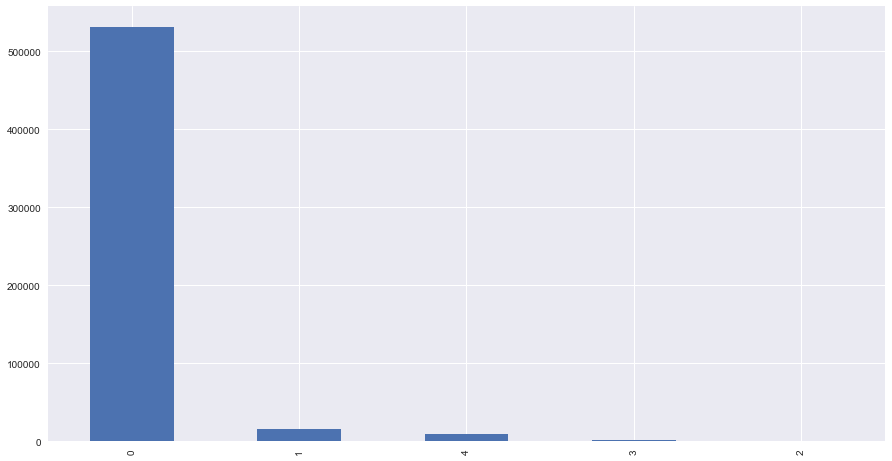

In [49]:
df_prod['cluster'].value_counts().plot(kind='bar');

In [50]:
df_prod[df_prod.cluster == 0].head(5)

,DISCOUNT_VALUE,NAME,PRICE,QUANTITY,date_insert,discount,itemID,orderID,ordered_item_count,price,user_id,cluster
0,23.55%,Хроники Амбера. Том 2,357.00,1,2017-03-19 22:25:20,110.00,169108,602051,1,527.00,911531,0
1,4.07%,Хроники Амбера. Том 1,448.00,1,2017-03-19 22:19:58,19.00,1394744,602047,1,618.00,911531,0
2,4.17%,Пищеводитель,414.00,1,2017-03-19 20:58:00,65.00,191276,602017,4,1503.00,911587,0
3,4.17%,Аудиокн. Мясников. &quot;Ржавчина&quot;: что д...,253.00,1,2017-03-19 20:58:00,65.00,157945,602017,4,1503.00,911587,0
4,4.09%,Инфекции. Как защитить себя и своего ребенка,422.00,1,2017-03-19 20:58:00,65.00,205173,602017,4,1503.00,911587,0


In [51]:
df_prod[df_prod.cluster == 1].head(5)

,DISCOUNT_VALUE,NAME,PRICE,QUANTITY,date_insert,discount,itemID,orderID,ordered_item_count,price,user_id,cluster
300,4.02%,#Мясомясо (книга+диск),999.00,4,2017-03-17 15:46:28,4037.00,195826,600959,8,42544.00,175158,1
301,4.02%,"Про еду, про вино, Прованс",903.00,6,2017-03-17 15:46:28,4037.00,195737,600959,8,42544.00,175158,1
302,4.02%,Вина Франции,1292.00,3,2017-03-17 15:46:28,4037.00,219306,600959,8,42544.00,175158,1
303,4.02%,Шампань и другие игристые вина,1292.00,3,2017-03-17 15:46:28,4037.00,709813,600959,8,42544.00,175158,1
304,4.06%,Вино и еда. Краткий курс для гурманов,1083.00,3,2017-03-17 15:46:28,4037.00,168696,600959,8,42544.00,175158,1


In [52]:
df_prod[df_prod.cluster == 2].head(5)

,DISCOUNT_VALUE,NAME,PRICE,QUANTITY,date_insert,discount,itemID,orderID,ordered_item_count,price,user_id,cluster
16788,22.22%,Урфин Джюс и его деревянные солдаты (вес: 335гр.),40.00,200,2017-03-16 14:53:11,14.00,194789,600212,1,8000.00,234692,2
20571,22.04%,"Почему одни страны богатые, а другие бедные",520.00,250,2017-03-22 16:06:06,147.00,189760,604364,1,130650.00,913110,2
44404,44.91%,Логопедия. Теория и практика,303.00,300,2017-03-20 16:56:22,247.00,716760,602735,1,90900.00,111280,2
49024,19.01%,Parfums mythiques. Эксклюзивная коллекция леге...,800.00,150,2017-03-29 15:46:06,1788.00,195991,609302,1,122700.00,9169,2
49845,3.94%,Четвертая промышленная революция (вес: 491гр.),614.67,300,2017-03-29 16:59:52,-56.67,219567,609331,1,185701.00,916760,2


In [53]:
df_prod[df_prod.cluster == 3].head(5)

,DISCOUNT_VALUE,NAME,PRICE,QUANTITY,date_insert,discount,itemID,orderID,ordered_item_count,price,user_id,cluster
81195,20.08%,Атлас автодорог России стран СНГ и Балтии (при...,191.20,2,2017-04-12 13:59:09,15299.00,290512,616630,243,74235.60,60383,3
81196,20.21%,Атлас автодорог России стран СНГ и Балтии (при...,150.40,1,2017-04-12 13:59:09,15299.00,290514,616630,243,74235.60,60383,3
81197,19.95%,"Атлас автодорог России, стран СНГ и Балтии (пр...",344.80,1,2017-04-12 13:59:09,15299.00,272958,616630,243,74235.60,60383,3
81198,19.9%,"Атлас автодорог России, стран СНГ и Балтии (пр...",313.60,1,2017-04-12 13:59:09,15299.00,272959,616630,243,74235.60,60383,3
81199,20.11%,Атлас автодорог России стран СНГ и Балтии (при...,282.40,1,2017-04-12 13:59:09,15299.00,272998,616630,243,74235.60,60383,3


In [54]:
df_prod[df_prod.cluster == 4].head(5)

,DISCOUNT_VALUE,NAME,PRICE,QUANTITY,date_insert,discount,itemID,orderID,ordered_item_count,price,user_id,cluster
285,45.1%,Атлас мира для детей,325.00,16,2017-03-17 16:44:12,267.00,161951,601000,1,5200.00,118208,4
299,4.02%,#Пастапаста,1065.00,10,2017-03-17 15:46:28,4037.00,196138,600959,8,42544.00,175158,4
306,4.08%,#неслипнется,512.00,15,2017-03-17 15:46:28,4037.00,188927,600959,8,42544.00,175158,4
562,45.06%,Животные. Все обитатели нашей планеты,834.00,23,2017-03-16 17:41:02,684.00,715598,600352,1,19182.00,198448,4
570,19.95%,Чайка. Три сестры. Вишневый сад (вес: 513гр.),276.00,36,2017-03-16 17:08:14,12.00,219266,600329,1,9936.00,910163,4


Результаты оказались еще более интересными. Помимо розничных попателей, образовались кластеры для крупно оптовых покупателей и среднеоптовых покупателей для параметра ordered_item_count (ordered_item_count < 100 и ordered_item_count > 100). А также кластеры для крупно оптовых покупателей и среднеоптовых покупателей для параметра QUANTITY (QUANTITY < 100 и QUANTITY > 100).

# Подсказки

* Проводить EDA и работу с признаками на всем датасете
* Для построения модели отсеивать данные тем или иным способом (обосновать выбор) - уменьшить объем данных для анализа
* Оформлять для сдачи задания все эксперименты (в том числе неудачные). Так мы сможем увидеть процесс работы над заданием
* Не тратить 90% времени на первый этап. Планировать время так, чтобы успеть поработать над моделью (в равной степени над каждым пунктом).